# Ch/ChE 164 Project
## Marta Gonzalvo
## March 18$^{\mathrm{th}}$, 2020

In this python notebook I have included both the required analysis and results, as well as the necessary code. Below all the necessary imports:

In [1]:
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt
import time
import ast

## Part 0: Energy

#### a) Occupation of cells contribution:
\begin{align}
    4\,\epsilon \sum_{i=1}^{L}s_i
\end{align}
Each water cell is surrounded by 4 nanotube cells.  If $s_i = 1$, the contribution will be $4\,\epsilon$, and if $s_i = -1$, the contribution will be $-4\,\epsilon$. So the penalty per cell of water occupation is of $2\,\epsilon$.
#### b) Pairing of spins contribution:
\begin{align}
    - J \sum_{j=0}^{L}s_j s_{j+1}
\end{align} 
So for $L$ cells there are $L+1$ interactions, and we use the same method as above to penalyze different adjacent occupations by $2J$. And taking into account the boundary conditions, where the adjacent cells to the $s_1$ and $s_L$ cells will always be filled with water: $s_0 = s_{i+1} = 1$, we can rewrite that as 
\begin{align}
    - J \sum_{j=1}^{L-1}s_j s_{j+1} - J s_1 - J s_L
\end{align}
So the Hamiltonian has the form of 
\begin{align}
   H\,\{s\} = 4\,\epsilon \sum_{i=1}^{L}s_i - J \sum_{j=1}^{L-1}s_j s_{j+1} - J s_1 - J s_L
\end{align}

Code to calculate the hamiltonian energy:

In [2]:
def energy(eps, J, microstates):
    '''Computes the Energy for all microstates (np.array) unitless (E/(kB*T).
    eps, J are unitless constants (divided by kB*T).'''

    coup_wat_nanot = 4*eps*np.sum(microstates, axis=1)

    coup_spins = np.sum(microstates[:,:-1]*microstates[:,1:], axis=1)
    coup_wat = - J*(coup_spins + microstates[:,0] + microstates[:,-1])
    
    return coup_wat_nanot + coup_wat

Function to generate all possible microstates:

In [3]:
def microstates(L=5, s_vals=[-1,1]):
    '''Generates all possible microstates, 
    given length of system and possible values of s_i'''
    
    return np.unique(np.random.choice(s_vals, size=(L*200,L)), axis=0)

In [4]:
print(len(microstates()))
microstates()

32


array([[-1, -1, -1, -1, -1],
       [-1, -1, -1, -1,  1],
       [-1, -1, -1,  1, -1],
       [-1, -1, -1,  1,  1],
       [-1, -1,  1, -1, -1],
       [-1, -1,  1, -1,  1],
       [-1, -1,  1,  1, -1],
       [-1, -1,  1,  1,  1],
       [-1,  1, -1, -1, -1],
       [-1,  1, -1, -1,  1],
       [-1,  1, -1,  1, -1],
       [-1,  1, -1,  1,  1],
       [-1,  1,  1, -1, -1],
       [-1,  1,  1, -1,  1],
       [-1,  1,  1,  1, -1],
       [-1,  1,  1,  1,  1],
       [ 1, -1, -1, -1, -1],
       [ 1, -1, -1, -1,  1],
       [ 1, -1, -1,  1, -1],
       [ 1, -1, -1,  1,  1],
       [ 1, -1,  1, -1, -1],
       [ 1, -1,  1, -1,  1],
       [ 1, -1,  1,  1, -1],
       [ 1, -1,  1,  1,  1],
       [ 1,  1, -1, -1, -1],
       [ 1,  1, -1, -1,  1],
       [ 1,  1, -1,  1, -1],
       [ 1,  1, -1,  1,  1],
       [ 1,  1,  1, -1, -1],
       [ 1,  1,  1, -1,  1],
       [ 1,  1,  1,  1, -1],
       [ 1,  1,  1,  1,  1]])

# Part 1

The partition function for the system is 
\begin{align}
 Z = \sum_{\{s\}} e^{-\beta H(\{s\})}.
\end{align}
So the probability for  a macrostate is 
\begin{align}
P(N)= \frac{\sum_{\{s\}} e^{-\beta H(\{s\})}\delta(N-\sum^L_{i=1}m_i(s_i))}{\sum_{\{s\}} e^{-\beta H(\{s\})}}, 
\end{align}
where $m_i(s_i) = \frac{1+s_i}{2}$, and $\sum_i m_i = N$.

For the case where the totally filled ($N=L$) and totally empty ($N=0$) microstates are degenerate, $H\,\{1,1,1,1,1\} = H\,\{-1,-1,-1,-1,-1\}$.
\begin{align}
H\,\{s\} &= 4\,\epsilon \sum_{i=1}^{L}s_i - J \sum_{j=1}^{L-1}s_j s_{j+1} - J s_1 - J s_L \\
H\,\{1,1,1,1,1\} &= 4\,\epsilon \, 5 - 4 J  - J - J  = 20 \, \epsilon - 6 J \\
H\,\{-1,-1,-1,-1,-1\} &= - 4\,\epsilon \, 5 - 4 J  + J + J = - 20 \, \epsilon - 2 J \\
H\,\{1,1,1,1,1\} &= H\,\{-1,-1,-1,-1,-1\} \\
20 \, \epsilon - 6 J &= - 20 \, \epsilon - 2 J \\
40 \, \epsilon &=  4 J \\
\epsilon &= 0.1 J = \frac{J}{10}
\end{align}


# J/KBt ETC!

In [5]:
def partition_fn(eps, J, microstates=microstates()):
    '''Returns partition function for all microstates.'''
    
    x = energy(eps, J, microstates)
    
    return np.sum(np.exp(-x))

In [6]:
def m_i(microstates):
    '''Computes list of m_i, given list of spins.
    s_i=1, m_i=1. s_i=-1, m_i=0'''
    
    m_i = np.array(microstates) == 1

    return m_i.astype(float)

Calculate list of probability of all macrostates. Possible macrostates: $\{N\}=\{0, 1, 2, 3, 4, 5\}$.

In [7]:
def all_probs(eps, J, L=5, microstates=microstates()):
    '''Calculates all probabilities for all macrostates.
    Returns a list of probabilities for each macrostate.'''
    all_probs = []
    
    exp_energies = np.exp(-energy(eps,J,microstates))
    partition = partition_fn(eps, J, microstates)
    
    div = exp_energies/partition
    
    for N in range(L+1):
        
        m = m_i(microstates)
        delta = np.sum(m, axis=1) == N 
        
        prob_N = np.sum(div*delta)      
        
        all_probs.append(prob_N)
        
    return all_probs

Plot of $P(N)$.

In [8]:
macrostates = [0,1,2,3,4,5]

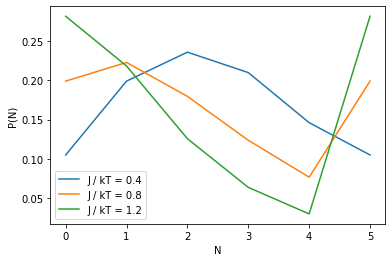

In [9]:
J_part1 = [0.4, 0.8, 1.2]

for J in J_part1:
    plt.plot(macrostates, all_probs(J/10, J), label='J / kT = {}'.format(J)); 
plt.legend();
plt.xlabel('N');
plt.ylabel('P(N)');

# INTERPRET RESULTS
J increasing or T decreasing as p.4-> 0.8
J: energy of creating a surface
if J=0: no E penalty, doesn't matter if gas or water. Low J, low surface tension, high J, high surface tension
high J: most likely no interface
(opposite as here)

REVISIT PLOT

Checking how these results match with the number of microstates for each macrostate.

| N | # microstates |
|---|----|
| 0 | 1 |
| 1 | 5 |
| 2 | 10 |
| 3 | 5 |
| 4 | 10 |
| 5 | 1 |

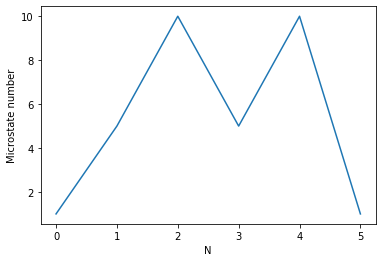

In [10]:
mic_numb = [1,5,10,5,10,1]
plt.plot(macrostates, mic_numb);
plt.xlabel('N');
plt.ylabel('Microstate number');

Calculating free energy $F(N)$.

In [11]:
def free_energy(eps, J, L=5, microstates=microstates()):
    '''Calculates free energy given the probability for a macrostate.'''

    return -np.log(all_probs(eps, J, L, microstates))

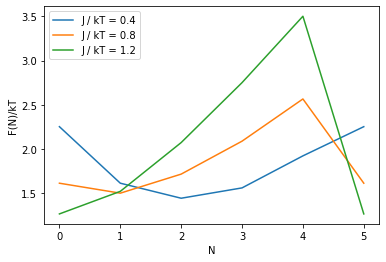

In [12]:
for J in J_part1:
    plt.plot(macrostates, free_energy(J/10, J), label='J / kT = {}'.format(J));

plt.legend();
plt.xlabel('N');
plt.ylabel('F(N)/kT');

# interpret results

## Surface tension

For each interface of area $d^2 = 3.7^2 \, \unicode[serif]{xC5} ^2 $, there is a $2J$ penalty, so the expression relating the two using the surface tension is 
\begin{align}
2 J = \gamma d^2.
\end{align}
Using the value of $\gamma = 72$ mN/m $= 72$ mJ/$\mathrm{m}^2 =$ 0.072 J/$\mathrm{m}^2$, we can get $J$, or $J/k_B T$:
\begin{align}
2 J & = \gamma d^2 \\
2 J & = 0.072 \, \mathrm{J/m}^2 \, (3.7·10^{-10})^2 \, \mathrm{m}^2 \\
J & = 4.928·10^{-21}\\
J/k_B T & = 1.198
\end{align}

The value that corresponds to $J/k_B T$ at room temperature is $J/k_B T = 1.2$.

In [13]:
# Calculation
J = ((3.7*(10**(-10)))**2 * 0.072/2)
print(J)
J/(298*1.380649*(10**(-23)))

4.9284000000000005e-21


1.197860935948025

# Part 2

In this plot above I show filled, empty and bistable occupancy. In the plots below I show the three separately, so they are easier to identify:

- under 0.05 mostly filled
- when $\epsilon = \, J \, / \, 10$, bistable
- over 0.4 mostly empty


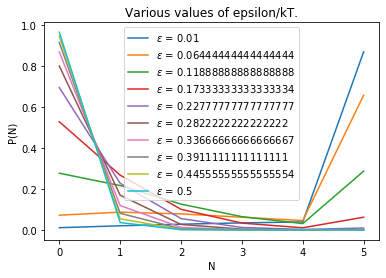

In [14]:
eps_var = np.linspace(0.01,0.5, 10)
J_rt = 1.198

for eps in eps_var:
    plt.plot(macrostates, all_probs(eps, J_rt), label='$\epsilon$ = {}'.format(eps));

plt.title('Various values of epsilon/kT.')
plt.legend();
plt.xlabel('N');
plt.ylabel('P(N)');

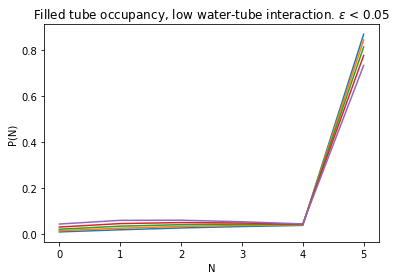

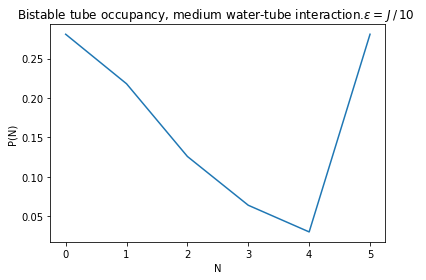

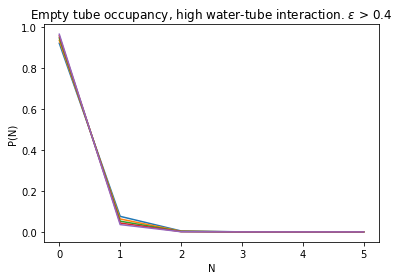

In [15]:
#Defining epsilon values
eps_filled = np.linspace(0.01,0.05, 5)
eps_empty = np.linspace(0.4,0.5, 5)

#Filled
for eps in eps_filled:
    plt.plot(macrostates, all_probs(eps, J_rt));

plt.title('Filled tube occupancy, low water-tube interaction. $\epsilon$ < 0.05')
plt.xlabel('N');
plt.ylabel('P(N)');
plt.show()

#Bistable
#for eps in eps_bistable:
    #plt.plot(macrostates, all_probs(eps_bistable, J_rt));
plt.plot(macrostates, all_probs(J_rt/10, J_rt))
plt.title('Bistable tube occupancy, medium water-tube interaction.$\epsilon = \, J \, / \, 10$  ')
plt.xlabel('N');
plt.ylabel('P(N)');
plt.show()



#Empty
for eps in eps_empty:
    plt.plot(macrostates, all_probs(eps, J_rt));

plt.title('Empty tube occupancy, high water-tube interaction. $\epsilon$ > 0.4')
plt.xlabel('N');
plt.ylabel('P(N)');

# Part 3

First, trying to analyze the values of J vs $\epsilon$ for the different P(N), including peaks and non-peaks:

In [16]:
def Energy(eps, J, spins):
        '''Computes the Energy for a given microstate, unitless (E/(kB*T).
        eps, J are unitless constants (divided by kB*T), spins is a list.'''
        
        coup_wat_nanot = 4*eps*np.sum(spins)
        
        coup_spins = [spins[i]*spins[i+1] for i,_ in enumerate(spins[:-1])]
        coup_wat = - J*(np.sum(coup_spins) + spins[0] + spins[-1])
        
        return coup_wat_nanot + coup_wat
    
def probability_microstate(eps, J, spins, N, L=5, microstates=microstates()):    
    '''Computes probability of given microstate, given a macrostate. 
    Microstates is list of lists of spins. 
    Returns a single value'''
    
    partit_fn =  np.sum(np.exp(-Energy(eps, J, spins)) for spins in microstates)
    
    if np.sum(m_i(spins)) == N:
        
        
        return np.exp(-Energy(eps, J, spins))/partit_fn
    else:
        
        return 0


def probability_macrostate(eps, J, N, L=5, microstates=microstates()):    
    '''Computes probability of given macrostate. 
    Microstates is list of lists of spins.
    Returns a single value.'''
        
    return np.sum([probability_microstate(eps, J, spins, N, L, microstates) 
                   for spins in microstates])

C:\Users\M\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


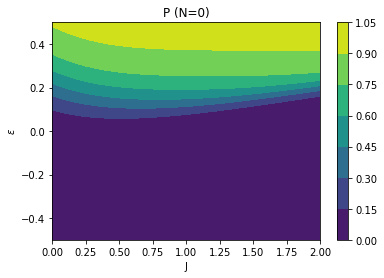

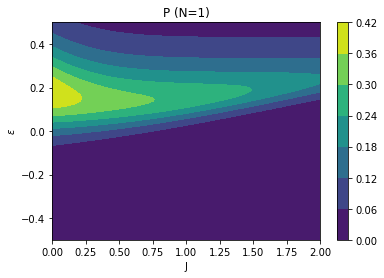

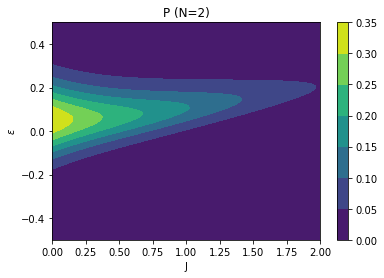

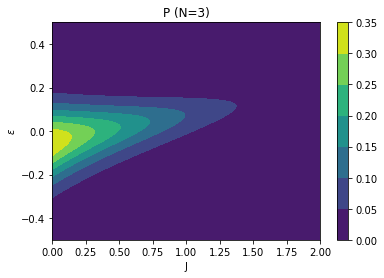

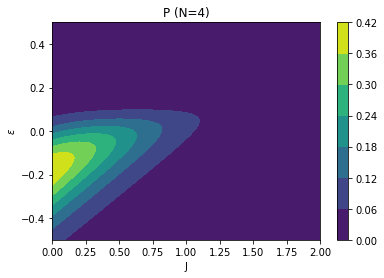

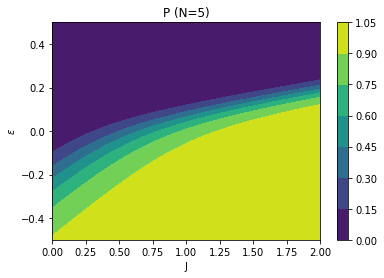

In [17]:
J_part3 = np.linspace(0, 2, 100) # my previous limits: (-1, 2)
eps_part3 = np.linspace(-0.5, 0.5, 100) # my previous limits: (-1, 5)

J_mesh, ep_mesh = np.meshgrid(J_part3, eps_part3)


for N in macrostates:
    
    P = probability_macrostate(ep_mesh, J_mesh, N)
    plt.figure()
    plt.contourf(J_mesh, ep_mesh, P)
    plt.title('P (N={})'.format(N))
    plt.xlabel('J')
    plt.ylabel('$\epsilon$')
    plt.colorbar()


Now, writing a function to find the peaks in given P(J, $\epsilon$).

In [18]:
all_probs(1,1)

[0.9993107673110596,
 0.0006888827648708668,
 3.4976895876845266e-07,
 1.5504708461165857e-10,
 6.327718496109794e-14,
 2.317924139286222e-16]

In [20]:
def find_peaks(eps, J, L=5, microstates=microstates()):
    '''Finds peaks of probability distribution of macrostates for given parameters.'''
    probs = all_probs(eps, J)
    peaks = []
    
    for i, p in enumerate(probs):
        if i == 0:
            if p > probs[i+1]:
                peaks.append(i)
            
        if i > 0 and i < L: 
            if p > probs[i-1] and p > probs[i+1]:
                peaks.append(i)
            
        if i == L:
            if p > probs[i-1]:
                peaks.append(i)
                   
    total_peaks = np.sum(len(peaks))
    
    # More than one peak
    if total_peaks > 1:
        largest_prob = np.argmax([probs[i] for i in peaks])
        return [eps, J, total_peaks, largest_prob] 

    # Only one peak
    return [eps, J, total_peaks, peaks]

Calculating necessary data. It is commented so that it doesn't run again when I run the whole notebook. I saved the orignial results in a file so I can load it (see cell below). 

In [21]:
eps_part3 = np.linspace(0, 0.5, 100) 
J_part3 = np.linspace(0, 2, 100)
ep_mesh, J_mesh = np.meshgrid(eps_part3, J_part3)

start = time.time()
peak_info = []
for eps, Js in zip(ep_mesh, J_mesh):
    for ep, J in zip(eps,Js):
        peaks = find_peaks(ep,J)
        peak_info.append(peaks)  

Loading the dataframe and turning it back onto a list.

In [22]:
# Saving results
        
#df_peak_info = pd.DataFrame(peak_info)
#df_peak_info.to_csv(r'peak_info.csv', index = False) 
#df_peak_info.head()
#df_loaded = pd.read_csv('peak_info.csv')

#untidy = df_loaded.values.tolist()
#peak_info = []
#for p in untidy:
#    p[2] = ast.literal_eval(p[2])
#    peak_info.append(p)

Making the phase diagram.

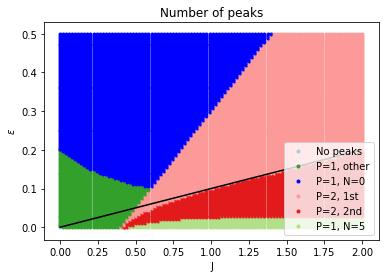

In [26]:
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']

n_0, n_1, n_2, n_3, n_4, n_5, n_6, n_7, n_8 = 0,0,0,0,0,0,0,0,0

for p in peak_info:

    if p[2] == 0:
        if n_0 == 0:
            plt.scatter(p[1], p[0], color=colors[0], marker='.', label='No peaks')
        plt.scatter(p[1], p[0], color=colors[0], marker='.')
        n_0 +=1
    # 1 peak
    ## Empty
    if p[2] == 1 and p[3]==[0]:
        if n_1 == 0:
            plt.scatter(p[1], p[0], color='blue', marker='.', label='P=1, N=0')
        plt.scatter(p[1], p[0], color='blue', marker='.')
        n_1 +=1
    ## Full
    if p[2] == 1 and p[3]==[5]:
        if n_2 == 0:
            plt.scatter(p[1], p[0], color=colors[2], marker='.', label='P=1, N=5')
        plt.scatter(p[1], p[0], color=colors[2], marker='.')
        n_2 +=1
    ## Elsewhere
    if p[2] == 1 and p[3]!=[0] and p[3]!=[5]:
        if n_3 == 0:
            plt.scatter(p[1], p[0], color=colors[3], marker='.', label='P=1, other')
        plt.scatter(p[1], p[0], color=colors[3], marker='.')
        n_3 +=1

    #2 peaks
    ## First larger
    if p[2] == 2 and p[3]==[0]: # 1st larger
        if n_4 == 0:
            plt.scatter(p[1], p[0], color=colors[4], marker='.', label='P=2, 1st')
        plt.scatter(p[1], p[0], color=colors[4], marker='.')
        n_4 +=1
    ## Second larger
    if p[2] == 2 and p[3]==[1]: #and 2nd larger:
        if n_5 == 0:
            plt.scatter(p[1], p[0], color=colors[5], marker='.', label='P=2, 2nd')
        plt.scatter(p[1], p[0], color=colors[5], marker='.')
        n_5 +=1
    
    # 3, 4, and 5 peaks
    if p[2] == 3:
        if n_6 == 0:
            plt.scatter(p[1], p[0], color=colors[6], marker='.', label='P=3')
        plt.scatter(p[1], p[0], color=colors[6], marker='.')
        n_6 +=1
    if p[2] == 4:
        if n_7 == 0:
            plt.scatter(p[1], p[0], color=colors[7], marker='.', label='P=4')
        plt.scatter(p[1], p[0], color=colors[7], marker='.')
        n_7 +=1
    if p[2] == 5:
        if n_8 == 0:
            plt.scatter(p[1], p[0], color=colors[8], marker='.', label='P=5')
        plt.scatter(p[1], p[0], color=colors[8], marker='.')
        n_8 +=1

plt.title('Number of peaks')
plt.xlabel('J')
plt.ylabel('$\epsilon$')

J_special = [0,2]
eps_special = [0,0.2]
plt.plot(J_special, eps_special, color='black');

plt.legend();

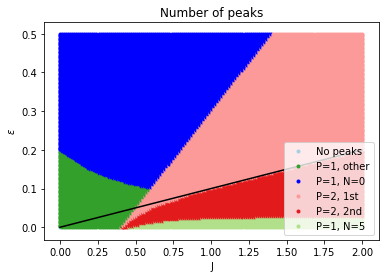

In [30]:
eps_part3 = np.linspace(0, 0.5, 150) 
J_part3 = np.linspace(0, 2, 150)
ep_mesh, J_mesh = np.meshgrid(eps_part3, J_part3)

start = time.time()
peak_info_10 = []
for eps, Js in zip(ep_mesh, J_mesh):
    for ep, J in zip(eps,Js):
        peaks = find_peaks(ep,J)
        peak_info_10.append(peaks)
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']

n_0, n_1, n_2, n_3, n_4, n_5, n_6, n_7, n_8 = 0,0,0,0,0,0,0,0,0

for p in peak_info_10[::]:

    if p[2] == 0:
        if n_0 == 0:
            plt.scatter(p[1], p[0], color=colors[0], marker='.', label='No peaks')
        plt.scatter(p[1], p[0], color=colors[0], marker='.')
        n_0 +=1
    # 1 peak
    ## Empty
    if p[2] == 1 and p[3]==[0]:
        if n_1 == 0:
            plt.scatter(p[1], p[0], color='blue', marker='.', label='P=1, N=0')
        plt.scatter(p[1], p[0], color='blue', marker='.')
        n_1 +=1
    ## Full
    if p[2] == 1 and p[3]==[5]:
        if n_2 == 0:
            plt.scatter(p[1], p[0], color=colors[2], marker='.', label='P=1, N=5')
        plt.scatter(p[1], p[0], color=colors[2], marker='.')
        n_2 +=1
    ## Elsewhere
    if p[2] == 1 and p[3]!=[0] and p[3]!=[5]:
        if n_3 == 0:
            plt.scatter(p[1], p[0], color=colors[3], marker='.', label='P=1, other')
        plt.scatter(p[1], p[0], color=colors[3], marker='.')
        n_3 +=1

    #2 peaks
    ## First larger
    if p[2] == 2 and p[3]==[0]: # 1st larger
        if n_4 == 0:
            plt.scatter(p[1], p[0], color=colors[4], marker='.', label='P=2, 1st')
        plt.scatter(p[1], p[0], color=colors[4], marker='.')
        n_4 +=1
    ## Second larger
    if p[2] == 2 and p[3]==[1]: #and 2nd larger:
        if n_5 == 0:
            plt.scatter(p[1], p[0], color=colors[5], marker='.', label='P=2, 2nd')
        plt.scatter(p[1], p[0], color=colors[5], marker='.')
        n_5 +=1
    
    # 3, 4, and 5 peaks
    if p[2] == 3:
        if n_6 == 0:
            plt.scatter(p[1], p[0], color=colors[6], marker='.', label='P=3')
        plt.scatter(p[1], p[0], color=colors[6], marker='.')
        n_6 +=1
    if p[2] == 4:
        if n_7 == 0:
            plt.scatter(p[1], p[0], color=colors[7], marker='.', label='P=4')
        plt.scatter(p[1], p[0], color=colors[7], marker='.')
        n_7 +=1
    if p[2] == 5:
        if n_8 == 0:
            plt.scatter(p[1], p[0], color=colors[8], marker='.', label='P=5')
        plt.scatter(p[1], p[0], color=colors[8], marker='.')
        n_8 +=1

plt.title('Number of peaks')
plt.xlabel('J')
plt.ylabel('$\epsilon$')

J_special = [0,2]
eps_special = [0,0.2]
plt.plot(J_special, eps_special, color='black');

plt.legend();

HE DOES eps vs J, label J/kT or $\beta J$
He also did 

Number the cases,then use colormap for that metric. colormap(c)-make a matrix, make a matrix c and then colormap(c)
P(5)>P(0)
P(N) 

Physical interpretation: 
- P=1, N=0, empty: only at high values of $\epsilon$
- P=1, N=5, full: only at low values of $\epsilon$ 
# (hydrophobicity/not)
- P=1, N=intermediate, intermediately full:lowe values of J, low values of $\epsilon$.

- No peaks only when J, $\epsilon$ is very small.
# No more than 2 peaks? large flucs? need more resolution?
- ask Andy. Hyengjoo did not find any
# MAKE FINER SO HIGHER RESOLUTION.

colorschemes: http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3

# Part 4

In this case, we can only have two cases: 0 or 2 interfaces, as an odd number of interfaces in a system where the bulk is water is not possible. For 0 interfaces, all $s_i$ = 1, and so the hamiltonian $ H\,\{s\} = 4\,\epsilon \sum_{i=1}^{L}s_i - J \sum_{j=1}^{L-1}s_j s_{j+1} - J s_1 - J s_L$ becomes is

\begin{align}
H \, (\{s_i = 1 \,\, \forall i \}) = 4 \, \epsilon L - J(L-1)
\end{align}


For a system with up to two grain boundaries, we can assign k and l as the index where the grain boundaries appear. There are 6 possible interfaces, starting from the bulk-first cell (interface = 0) until interface=5, where cell #5 is in contact with the bulk. For $k>l$, the number of unoccupied cells is $k-l$, and the number of occupied cells is $L-k-l$. The ranges are $l:0 \sim 4$, and $k:l+1 \sim L$. In this case, we can write the hamiltonian as 

\begin{align}
H &= [(L-(k-l)-(k-l)(-1)](4 \, \epsilon) + (L-3)J
\end{align}
# explain L-3

A modified partition function under the constraint will be
\begin{align}
Z^* &= \sum^2_{p=o}\sum_{\{s\}_p} e^{-\beta H(\{s\})} = \sum_{\{s\}_0} e^{-\beta H} + \sum_{\{s\}_2} e^{-\beta H} = e^{-\beta [4\epsilon L-J(L+1)]} + \sum_{\{s\}_2} e^{-\beta H}, \\
\end{align}

where the last term is:

\begin{align}
\sum_{\{s\}_2} e^{-\beta H} &= \sum_{q=1}^L \sum_{\{ s\}_2} exp{\{-\beta[(L-k+l-k+l)(4 \, \epsilon) + (L-3)J]\}} \, \delta(k-l-q) , \\
 &= \sum_{q=1}^L (L-q+1) e^{-\beta \, [4 \epsilon(L-2q) - J(L-3)]} \\
 &=  e^{-\beta [4 \epsilon L - J(L-3)]} \sum_{q=1}^L (L-q+1) \, e^{8 \, \beta 8 \epsilon q}
\end{align}

If we call the summation S,

\begin{align}
S &= \sum_{q=1}^L (L-q+1) \, e^{8 \, \beta \epsilon q} \\
e^{8 \, \beta \epsilon } S &= \sum_{q=1}^L (L-q+1) \, e^{8 \, \beta \epsilon (q+1)} = \sum_{q=2}^{L+1} (L-(q-1)+1) \, e^{8 \, \beta \epsilon (q+1)} &= \sum_{q=2}^{L+1} (L-q+2) \, e^{8 \, \beta \epsilon (q+1)} \\
S - e^{8 \, \beta \epsilon} S  &= (1-e^{8 \, \beta \epsilon})S = - \sum_{q=2}^Le^{8 \, \beta \epsilon q} + L e^{8 \, \beta \epsilon} - e^{8 \, \beta \epsilon (L+1)} \\
S &= \frac{- \sum_{q=2}^Le^{8 \, \beta \epsilon q} + L e^{8 \, \beta \epsilon} - e^{8 \, \beta \epsilon (L+1)} }{1-e^{8 \, \beta \epsilon} }
\end{align}

If we call this second summation s,

\begin{align}
s &= \sum_{q=2}^Le^{8 \, \beta \epsilon q} = e^{8 \, \beta \epsilon 2} + e^{8 \, \beta \epsilon 3} + ... + e^{8 \, \beta \epsilon L} \\
e^{8 \, \beta \epsilon } s &= e^{8 \, \beta \epsilon 3} + ... + e^{8 \, \beta \epsilon (L+1)} \\
(1-e^{8 \, \beta \epsilon }) s &= e^{8 \, \beta \epsilon 2} - e^{8 \, \beta \epsilon (L+1)} \\
s &= \frac{e^{8 \, \beta \epsilon 2} - e^{8 \, \beta \epsilon (L+1)}}{1-e^{8 \, \beta \epsilon }} 
\end{align}

Then the initial summation S is
\begin{align}
S &=  \frac{-e^{8 \, \beta \epsilon 2} + e^{8 \, \beta \epsilon (L+1)}}{(1-e^{8 \, \beta \epsilon})^2} + \frac{L e^{8 \, \beta \epsilon}}{1-e^{8 \, \beta \epsilon}}  - \frac{e^{8 \, \beta \epsilon (L+1)}}{1-e^{8 \, \beta \epsilon}} \\
 S &= \frac{e^{8 \beta \epsilon}(-1 -L + e^{8 \beta \epsilon L})}{e^{-8 \beta \epsilon} -1}
\end{align}

So overall, $Z^*$ in the closed form is:
\begin{align}
Z^* =& e^{-\beta [4\epsilon L-J(L+1)]} +  e^{-\beta [4 \epsilon L - J(L-3)]} \left[ \frac{-e^{8 \, \beta \epsilon 2} + e^{8 \, \beta \epsilon (L+1)}}{(1-e^{8 \, \beta \epsilon})^2} + \frac{L e^{8 \, \beta \epsilon}}{1-e^{8 \, \beta \epsilon}}  - \frac{e^{8 \, \beta \epsilon (L+1)}}{1-e^{8 \, \beta \epsilon}} \right]
\end{align}


Then the free energy will be:

\begin{align}
F &= - k_B T \, ln \, Z^* (N) \\
F &= -k_B T \, ln \, \left\{  e^{-\beta [4\epsilon L-J(L+1)]} +  e^{-\beta [4 \epsilon L - J(L-3)]} \left[ \frac{-e^{8 \, \beta \epsilon 2} + e^{8 \, \beta \epsilon (L+1)}}{(1-e^{8 \, \beta \epsilon})^2} + \frac{L e^{8 \, \beta \epsilon}}{1-e^{8 \, \beta \epsilon}}  - \frac{e^{8 \, \beta \epsilon (L+1)}}{1-e^{8 \, \beta \epsilon}} \right] \right\}
\end{align}



Don't need this I think.
\begin{align}
P\{q unoccupied cells\} = \frac{\sum_{microstatesqunocccells} e^{-\beta H}}{Z^*}
\end{align}



# REPASAR MATES

|1 | 2 | 3 |  4 | 5 |
|--- | --- | ---| ---| ---|
| 1 \|  | 2 \| | 3 \| | 4 \|  | 5 \| |

# COMPARISON OF RESULTS
# IMPLEMENT

In [ ]:
# 

At high temperatures, the method breaks down because entropy starts to take a bigger role
# explain well
mean field good at high epsilon. not good at low epsilons: high fluctuations

# Part 5

### Mean field treatment

For the uncoupled case, the hamiltonian for the i$\mathrm{^{th}}$ cell in mean field is 
\begin{align}
h_{i,mf} = -4\epsilon + J(<s_{i-1}>_{mf} + <s_{i+1}>_{mf})
\end{align}

So for each spin, $<s_{i}>_{mf}$ is:
\begin{align}
<s_{1}>_{mf} &= \mathrm{tanh}\,[-4\epsilon+\beta J (1+<s_{2}>_{mf})] \\
<s_{2}>_{mf} &= \mathrm{tanh}\,[-4\epsilon+\beta J (<s_{1}>_{mf}+<s_{3}>_{mf})] \\
... \\
<s_{L=5}>_{mf} &= \mathrm{tanh}\,[-4\epsilon+\beta J (<s_{4}>_{mf}+1)]
\end{align}

# fulfill?

We need to fulfill? all of the equations at once. So we can use an iterative approach to solve them. 


# NEED TO IMPLEMENT
###### parameters part 2
    eps_var = np.linspace(0.01,0.5, 10)
    J_rt = 1.198
    eps_filled = np.linspace(0.01,0.05, 5)
    eps_empty = np.linspace(0.4,0.5, 5)
    bistable eps  = J/10

Start filled and empty
reproduce plots P(N)
Compare with each other, exact part 2


importance fluc's water occupancy?

In [31]:
import scipy.optimize

def spin_solve(s, *args):
    eps, J = args
    s1, s2, s3, s4, s5 = s
    
    x1 = np.tanh(-4*eps + J*(1+s2)) - s1
    x2 = np.tanh(-4*eps+J*(s1+s3)) - s2
    x3 = np.tanh(-4*eps+J*(s2+s4)) - s3
    x4 = np.tanh(-4*eps+J*(s3+s5)) - s4
    x5 = np.tanh(-4*eps+J*(s4+1)) - s5
    
    x = np.array([x1, x2, x3, x4, x5])
    
    return x

In [32]:
J = 1.198
eps = J/10

x, a, b, c = scipy.optimize.fsolve(spin_solve, np.array([1,1,1,1,1]), (eps, J), full_output=True)

In [33]:
a

{'nfev': 12, 'fjac': array([[-9.94113371e-01,  1.07846838e-01,  5.02825852e-03,
          8.99692493e-03,  1.19910202e-03],
        [-1.06263084e-01, -9.85733220e-01,  1.30333502e-01,
          7.51623157e-04,  7.12666694e-03],
        [-1.77083402e-02, -1.28008827e-01, -9.83428859e-01,
          1.27137899e-01,  1.94639110e-03],
        [-1.10863982e-02, -1.53092570e-02, -1.25066801e-01,
         -9.86026597e-01,  1.08409239e-01],
        [-3.20465773e-03, -8.85694239e-03, -1.46242634e-02,
         -1.07265999e-01, -9.94078177e-01]]), 'r': array([ 1.00470960e+00, -2.12838074e-01,  9.44316854e-03, -1.51382482e-02,
        -4.20193175e-04,  9.92373052e-01, -2.53245042e-01,  1.71495642e-02,
        -1.54165578e-02,  9.82790788e-01, -2.53194708e-01,  5.68528249e-03,
         9.82585104e-01, -2.15902874e-01,  9.81099978e-01]), 'qtf': array([-2.47903439e-12,  7.24139103e-12, -7.39435508e-12,  5.78053513e-12,
        -1.11103954e-12]), 'fvec': array([ 0.00000000e+00, -1.11022302e-16,  1.1102

In [34]:
e, f, g, h = scipy.optimize.fsolve(spin_solve, np.array([-1,-1,-1,-1,-1]), (eps, J), full_output=True)

In [35]:
f

{'nfev': 12, 'fjac': array([[-9.99495529e-01,  2.84417937e-02,  7.50744139e-04,
          1.32255635e-02,  4.92677534e-03],
        [-2.80904958e-02, -9.99143450e-01,  1.80007969e-02,
          1.90362103e-02,  1.53910604e-02],
        [-1.03486429e-03, -1.76617494e-02, -9.99710709e-01,
          1.62809651e-02,  6.47811846e-04],
        [-6.11464374e-03, -2.89953574e-03, -1.11414311e-02,
         -7.15453196e-01,  6.98539044e-01],
        [-1.34592764e-02, -2.41471811e-02, -1.13918404e-02,
         -6.98086213e-01, -7.15389143e-01]]), 'r': array([ 9.95597167e-01, -9.97767430e-01, -2.31892511e-04, -1.81822117e-02,
        -9.05565190e-03,  9.67233760e-01, -3.33290707e-02, -9.19825641e-03,
        -2.80569125e-02,  9.99668232e-01, -3.23271384e-02, -1.16846995e-03,
         1.38910790e+00, -7.15448331e-01,  6.91720206e-01]), 'qtf': array([ 3.10952440e-10, -7.32811985e-10,  4.19201670e-11, -7.33413395e-10,
        -3.36597951e-10]), 'fvec': array([-1.63813407e-13,  4.35651515e-13, -2.4980

based Newton's method 

# Part 6

To model the dynamics of the system obeying detailed balance, I will use the Monte Carlo-Metropolis Algorithm, as explained in class. 
# write eqs? seen in class

# ok interval  [0,1)?

Functions to run the dynamics: acceptance criteria and actual dynamics.

In [36]:
def acceptance(eps,J,spins, L=5):
    '''Generates a new microstate and determines whether it should 
    be accepted or not. Spins is a list of spins.'''
        
    spins_test = np.copy(spins)
    to_change = int(np.random.randint(low=0,high=L,size=1))
    spins_test[:,to_change] = spins[:,to_change]*-1

    energy_start = energy(eps, J, spins)
    energy_test = energy(eps, J, spins_test)
    
    # Accept
    if energy_test <= energy_start:
        return spins_test  
    
    if np.random.random() <= np.exp(-energy_test):
        return spins_test
    
    # Reject
    return spins

#########################################################################

def dynamics(eps, J, init_spins, steps, L=5):
    '''Runs dynamics of the system.'''
    
    spins_dyn = np.zeros((steps, L))
    spins = init_spins
    
    for step in range(steps):
        spins = acceptance(eps, J, spins)
        spins_dyn[step] = spins
        
    return spins_dyn

Functions for the analysis of the dynamics of a system.

In [37]:
def avg_prob(dyns, eps, J, L=5):
    '''Calculates running average given the dynamics of a system. 
    Dyns is a list of microstates.'''
    avg_prob = np.zeros((len(dyns), L+1))
    
    for i, _ in enumerate(dyns):
        avg_prob[i] = all_probs(eps, J, L, dyns[:i+1])
        
    return avg_prob

#########################################################################

def info_dyn(dyns, eps, J, L=5):
    '''Calculates running average, occupation number 
    and number of interfaces given the dynamics of a system. Dyns 
    is a list of microstates.'''
    clean_info = m_i(dyns)
        
    # Occupation number
    occup = np.zeros(len(dyns))
    for i, c in enumerate(clean_info):
        occup[i] = np.sum(c)
        
    # Number of interfaces
    interf = np.zeros(len(dyns))
    for i, c in enumerate(clean_info):
        ext_0 = c[0]==0
        ext_L = c[L-1]==0
        
        interior = 0
        for m in range(len(c)-1):
            interior += c[m]!=c[m+1]
            
        interf[i] = ext_0+interior+ext_L
    
    return occup, interf

# OK BISTABILITY?

Calculating for the three different cases.

In [43]:
J_rt = 1.198
init_spins = np.array([[-1,-1,-1,-1,-1]])

#Running dynamics for 10,000 steps
eps_bist = J_rt/10
dyn_bist = dynamics(eps_bist, J_rt, init_spins, 10000)
prob_bist = avg_prob(dyn_bist, eps_bist, J_rt) # 23 s 10,000
info_bist = info_dyn(dyn_bist, eps_bist, J_rt)


#eps_filled = np.linspace(0.01,0.05, 5)
eps_filled = 0.03
dyn_filled = dynamics(eps_filled, J_rt, init_spins, 10000)
prob_filled = avg_prob(dyn_filled, eps_filled, J_rt) # 23 s 10,000
info_filled = info_dyn(dyn_filled, eps_filled, J_rt)


#eps_empty = np.linspace(0.4,0.5, 5)
eps_empty = 0.45
dyn_empty = dynamics(eps_empty, J_rt, init_spins, 10000)
prob_empty = avg_prob(dyn_empty, eps_empty, J_rt) # 23 s 10,000
info_empty = info_dyn(dyn_empty, eps_empty, J_rt)

Analysis of the results.

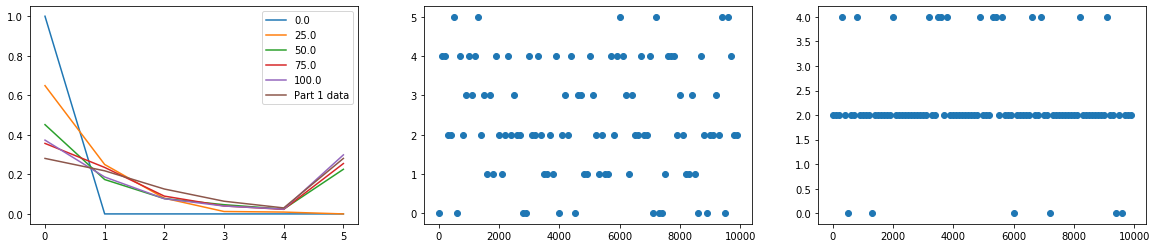

In [46]:
# TIME-AVERAGE PROBABILITY
a = 'Bistable'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4));
#fig.suptitle('{}'.format(a))
#ax1.plot(x, y)
#ax2.plot(x, -y)



#plt.subplots()
times = np.linspace(0,len(prob_bist)/100, 5)

for t in times:
    ax1.plot(macrostates, prob_bist[int(t)], label='{}'.format(t));

ax1.plot(macrostates, all_probs(J_rt/10, J_rt), label='Part 1 data');

#ax1.xlabel('N');
#ax1.ylabel('P(N)');
#ax1.title('P(N) in different times along dynamics')
ax1.legend();
#plt.show()


# OCCUPATION NUMBER
#.subplot()
ax2.scatter(range(len(info_bist[0]))[::100], info_bist[0][::100]);

#ax2.xlabel('t');
#ax2.ylabel('N');
#ax2.title('Occupation number vs time');
#plt.show()


# NUMBER OF INTERFACES
#plt.subplot()
ax3.scatter(range(len(info_bist[1]))[::100], info_bist[1][::100]);

#ax3.xlabel('t');
#ax3.ylabel('Number of interfaces');
#ax3.title('Number of interfaces vs time');
#fig.title('bistable')

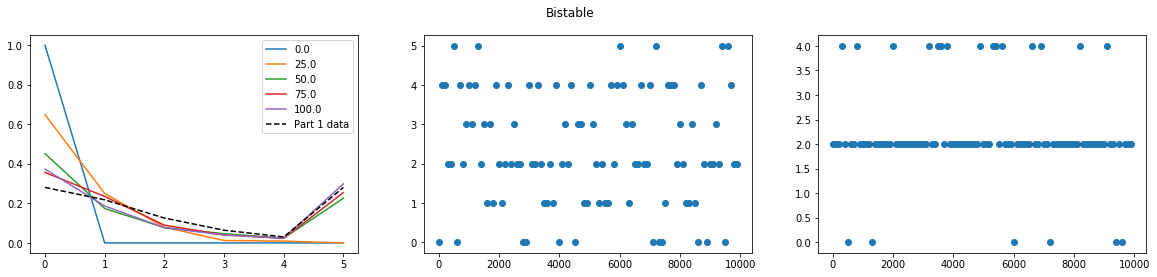

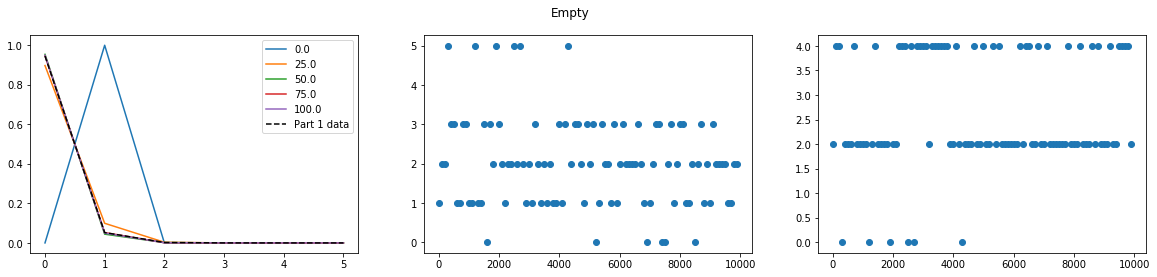

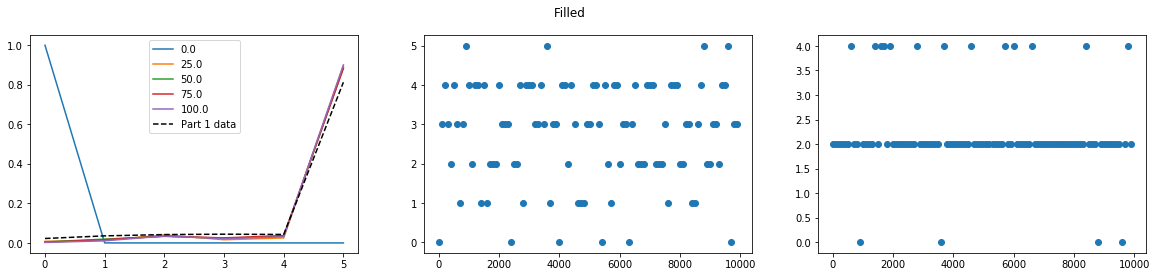

In [47]:
# TIME-AVERAGE PROBABILITY
a = 'Bistable'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4));
times = np.linspace(0,len(prob_bist)/100, 5)

for t in times:
    ax1.plot(macrostates, prob_bist[int(t)], label='{}'.format(t));

ax1.plot(macrostates, all_probs(eps_bist, J_rt), color='black',  linestyle= '--', label='Part 1 data');

ax1.legend();
# OCCUPATION NUMBER
ax2.scatter(range(len(info_bist[0]))[::100], info_bist[0][::100]);
# NUMBER OF INTERFACES
ax3.scatter(range(len(info_bist[1]))[::100], info_bist[1][::100]);
fig.suptitle('Bistable');

# TIME-AVERAGE PROBABILITY
b = 'Empty'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4));
times = np.linspace(0,len(prob_empty)/100, 5)

for t in times:
    ax1.plot(macrostates, prob_empty[int(t)], label='{}'.format(t));

ax1.plot(macrostates, all_probs(eps_empty, J_rt), color='black',  linestyle= '--', label='Part 1 data');

ax1.legend();
# OCCUPATION NUMBER
ax2.scatter(range(len(info_empty[0]))[::100], info_empty[0][::100]);
# NUMBER OF INTERFACES
ax3.scatter(range(len(info_empty[1]))[::100], info_empty[1][::100]);
fig.suptitle('Empty');

c = 'Filled'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4));
times = np.linspace(0,len(prob_filled)/100, 5)

for t in times:
    ax1.plot(macrostates, prob_filled[int(t)], label='{}'.format(t));

ax1.plot(macrostates, all_probs(eps_filled, J_rt), color='black',  linestyle='--', label='Part 1 data');

ax1.legend();
# OCCUPATION NUMBER
ax2.scatter(range(len(info_filled[0]))[::100], info_filled[0][::100]);
# NUMBER OF INTERFACES
ax3.scatter(range(len(info_filled[1]))[::100], info_filled[1][::100]);
fig.suptitle('Filled');

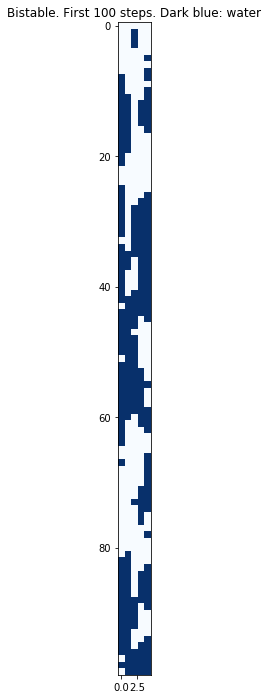

In [52]:
m = dyn_bist == 1
plt.rcParams["figure.figsize"] = (20,12)
plt.imshow(m[:100], cmap='Blues');
plt.title('Bistable. First 100 steps. Dark blue: water');
#ax = plt.gca();
#ax.set(xlim=(0, 4), ylim=(0, 100));

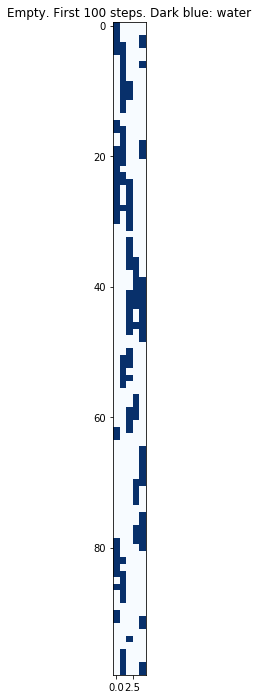

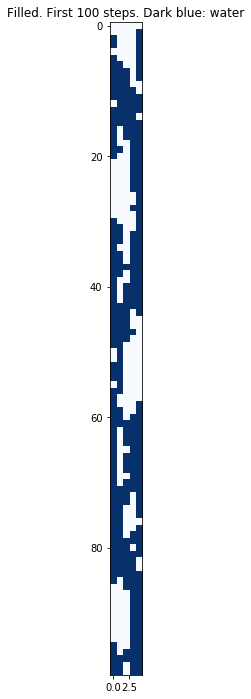

In [49]:
plt.rcParams["figure.figsize"] = (20,12)
plt.imshow(m_i(dyn_empty)[:100], cmap='Blues');
plt.title('Empty. First 100 steps. Dark blue: water');

plt.show()

plt.rcParams["figure.figsize"] = (20,12)
plt.imshow(m_i(dyn_filled)[:100], cmap='Blues');
plt.title('Filled. First 100 steps. Dark blue: water');


Last 100 (hard to read axis): also empties through the outside: 
# OJO IF GENERATE AGAIN LAST STEPS MIGHT NOT BE THE SAME

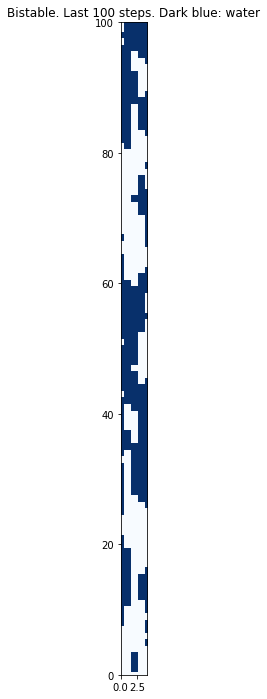

In [51]:
plt.rcParams["figure.figsize"] = (20,12)
plt.imshow(m[:-100], cmap='Blues');
ax = plt.gca();
ax.set(xlim=(0, 4), ylim=(0, 100));
plt.title('Bistable. Last 100 steps. Dark blue: water');

The mechanism is of filling first through the sides and then filling in the middle cells.

push it to my github repository